## TASK 2 PROJECT 1 -HEX SOFTWARES

## Model Performance Evaluation and Visualization

Introduction


In this project, we will evaluate the performance of a machine learning model using the Titanic dataset, a well-known dataset from the OpenML repository. The Titanic dataset provides information on the passengers of the Titanic, including details such as their age, gender, ticket class, and whether they survived the tragic sinking of the ship.

Why Choose the Titanic Dataset?

The Titanic dataset is a popular choice for data science projects due to several reasons:


Historical Significance: The story of the Titanic is widely known and provides a compelling narrative for our analysis.


Rich Features: The dataset includes a variety of features that allow for comprehensive exploration and modeling.


Educational Value: It's a great dataset for teaching and learning machine learning techniques, as it is small and easy to work with, yet still offers valuable insights.


Credits

The Titanic dataset is sourced from the OpenML repository and is maintained by the machine learning community. We extend our gratitude to all the contributors who have made this dataset available for educational and research purposes.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)
data = titanic.frame

# Drop irrelevant columns
data.drop(columns=['name', 'ticket', 'boat', 'body', 'home.dest'], inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert categorical columns to numerical
label_encoder = LabelEncoder()
categorical_cols = ['sex', 'cabin', 'embarked']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Display the first few rows
data.head()


C:\Users\princ\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,1,0,29.0000,0.0,0.0,211.3375,43,2
1,1.0,1,1,0.9167,1.0,2.0,151.5500,79,2
2,1.0,0,0,2.0000,1.0,2.0,151.5500,79,2
3,1.0,0,1,30.0000,1.0,2.0,151.5500,79,2
4,1.0,0,0,25.0000,1.0,2.0,151.5500,79,2


# Data Splitting 

## Importance of Data Splitting

Splitting the data into training and testing sets prevents overfitting, provides a fair method for model evaluation, and helps in tuning hyperparameters. We split our data into 80% training and 20% testing to ensure the model learns effectively while being evaluated on unseen data.


In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X = data.drop(columns=['survived'])
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model
Choose a classification model (we will use Random Forest for its simplicity and effectiveness).

Train the model on the training dataset.

## Why Random Forest?

We chose Random Forest for its versatility, robustness, and ability to handle missing values. It provides high accuracy and insights into feature importance, making it a reliable choice for our analysis.

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluate the Model
Evaluate the model's performance using accuracy, precision, recall, and F1 score.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77


These are solid results for a first run with the Random Forest model on the Titanic dataset! Here's a quick rundown of what these metrics mean:

Accuracy: 0.77: This means our model correctly classified 77% of the instances in the test set. This is a decent accuracy, indicating that the model has learned to make reliable predictions.

Precision: 0.77: Our model's positive predictions are 77% correct. This suggests a good balance between precision and false positives.

Recall: 0.77: The model correctly identified 77% of the actual positive instances. This indicates effective capture of positive instances.

F1 Score: 0.77: The harmonic mean of precision and recall is 0.77, showing that our model maintains a good balance between these two metrics.

Overall, a 0.77 score across these metrics suggests our Random Forest model performs quite well on the Titanic dataset

## Visualize the Results
As I am using the confusion matrix and classification report for visualization.

Adding some plots to make it visually engaging.

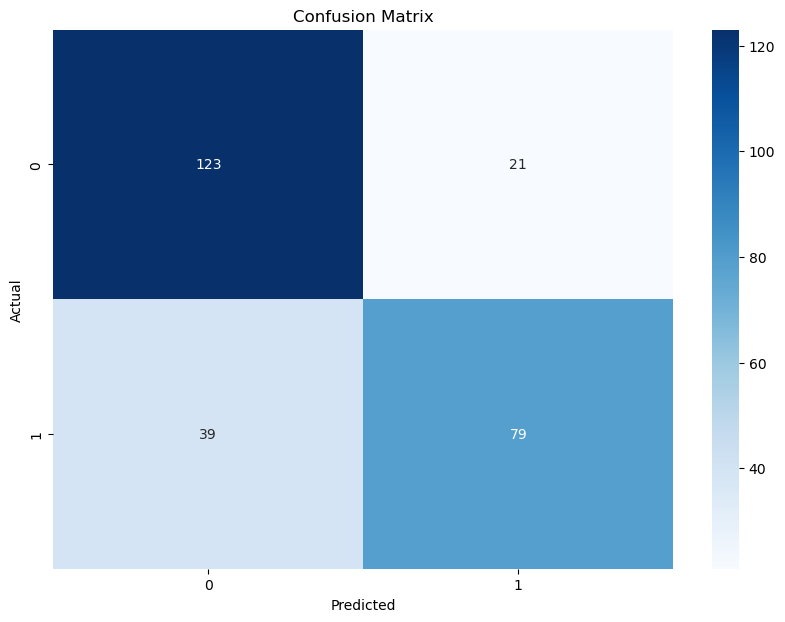

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       144
           1       0.79      0.67      0.72       118

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred))


## Detailed Model Evaluation

Class 0 (Did Not Survive)
Precision: 0.76: Out of all the predictions made for Class 0 (did not survive), 76% were correct.

Recall: 0.85: Out of all the actual instances of Class 0, 85% were correctly identified by the model.

F1-Score: 0.80: This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for Class 0.

Support: 144: The number of actual instances of Class 0 in the test set.

Class 1 (Survived)
Precision: 0.79: Out of all the predictions made for Class 1 (survived), 79% were correct.

Recall: 0.67: Out of all the actual instances of Class 1, 67% were correctly identified by the model.

F1-Score: 0.72: This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for Class 1.

Support: 118: The number of actual instances of Class 1 in the test set.

Overall Metrics
Accuracy: 0.77: The overall proportion of correctly classified instances is 77%.

Macro Average: This is the unweighted average of precision, recall, and F1-score for both classes. It provides a general sense of the model's performance across all classes.

Precision: 0.77

Recall: 0.76

F1-Score: 0.76

Weighted Average: This average takes into account the support (the number of true instances) for each class, providing a more balanced overview of the model's performance.

Precision: 0.77

Recall: 0.77

F1-Score: 0.77

## Insights

The model performs slightly better at identifying passengers who did not survive (Class 0) than those who survived (Class 1). This can be seen from the higher recall for Class 0 (0.85) compared to Class 1 (0.67).

The balanced F1-scores (0.80 for Class 0 and 0.72 for Class 1) indicate that the model maintains a good trade-off between precision and recall for both classes.

The overall accuracy of 77% is a solid starting point, suggesting that the model is effective, but there's always room for further improvement.

# We have come to the end of project 1 , see you on the next one 😉